# Ploting multiple spectra with amplification factors

### Importing packages

In [1]:
from __future__ import division, print_function
from astropy.coordinates import SkyCoord
import numpy as np
from astropy import wcs
from astropy.io import fits
import sys
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
from astropy import units as u  
from astropy.modeling import models, fitting
%matplotlib inline

### Concatenated and feathered data sets

In [2]:
filename_gas_conc=fits.open('/home/jp/Desktop/Research/Data2.0/Serpens/Serpens_concat_c18o_cube.fits')
filename_gas_feather=fits.open('/home/jp/Desktop/Research/Data2.0/Serpens/Serpens_Feather_c18o.fits')

### RMS info to plot 3-sigma line 

In [3]:
mom0_rms=np.mean(filename_gas_conc[0].data[:,689:719,939:977].std())
levs_3=3*mom0_rms
mom0_rms_f=np.mean(filename_gas_feather[0].data[:,689:719,939:977].std())
levs_3_f=3*mom0_rms_f

### Obtain source coordinates

In [4]:
filenametxt='/home/jp/Desktop/Research/Data/sourcecoordinates.txt'

In [5]:
ra,dec = np.loadtxt(filenametxt,unpack=True,usecols=(0,1),dtype='S')

In [6]:
Ra=[]
Dec=[]
for i in range(len(ra)):
    Ra.append(ra[i].decode("utf-8"))
for i in range(len(dec)): 
    Dec.append(dec[i].decode("utf-8"))

In [7]:
coord=SkyCoord(Ra,Dec,frame='icrs',unit=(u.hourangle,u.deg))

### Transform sky coords to pixel coords

In [8]:
filename='/home/jp/Desktop/Research/Data2.0/moment_0_New.fits'
Pixlist=[]
hdulist = fits.open(filename)
w=wcs.WCS(hdulist[0].header)
for i in range(len(coord)):
	arr=np.array([[coord.ra[i].value,coord.dec[i].value]])
	xpix,ypix=w.all_world2pix(arr,0)[0]
	Pixlist.append((xpix,ypix))

### Specify cube info and number of horizontal and vertical plots

In [9]:
chan=72
horplots=4
verplots=4
vc=8.0*u.km/u.s

### Creating x-axis

In [10]:
hduconc=filename_gas_conc
hdufeather=filename_gas_feather
vo=hduconc[0].header['CRVAL3']/1000
deltv=hduconc[0].header['CDELT3']/1000
l1array=vo+np.arange(chan)*deltv

### Creating 3-sigma array to plot

In [11]:
ls=[]
for i in range(len(l1array)):
    ls.append(levs_3)
lsf=[]
for i in range(len(l1array)):
    lsf.append(levs_3_f)

### Creating subplots figure

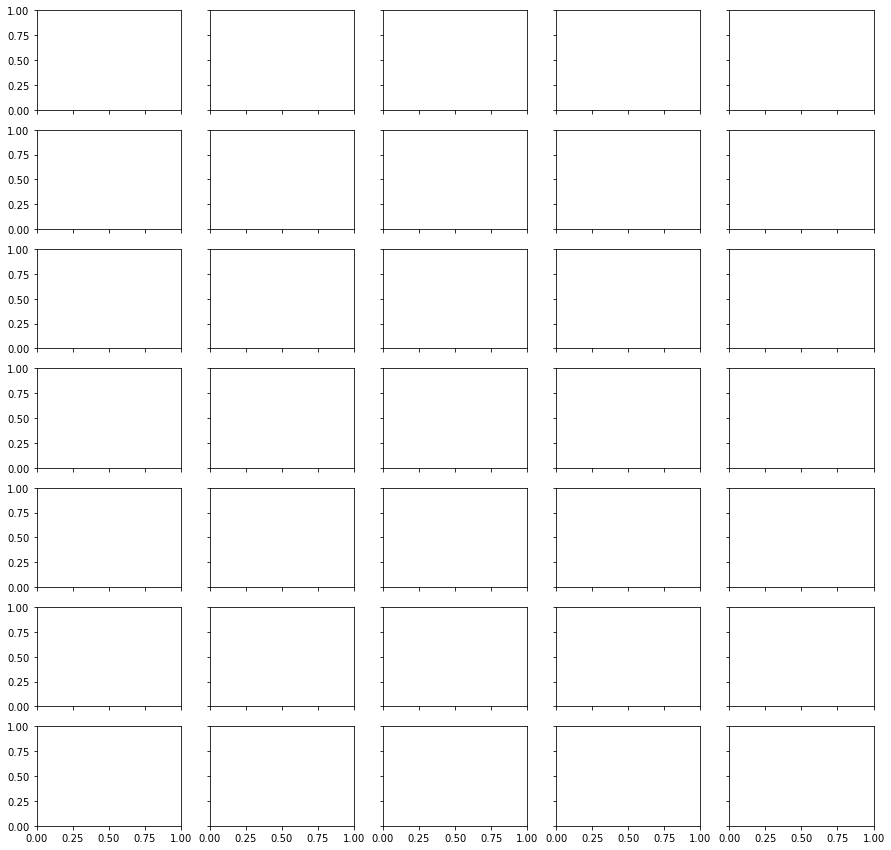

In [12]:
li="("
for i in range(7):#10
	b="("
	for j in range(5):#7
		b+="ax"+str(i*7+1+j)+','	
	li+=b[:-1]+"),"
li+=li[:-1]+")"
f, li = plt.subplots(7, 5, sharex='col', sharey='row',figsize=(15,15))

### Amplification lists

In [13]:
genlist=[29,32,33]
amplist10=[3,4]
amplist1dot5=[16,34,35]
amplist9=[1]
amplist4=[26,28]
amplist6=[2,5,7]
amplist5=[8,25]
amplist3=[6,9,11,14,19,20,21,22,30]
amplist2=[10,12,13,15,17,18,23,24,27,31]
amplist8=[]
amplist7=[]
'''
genlist=[45,46]
amplist10=[67]
amplist1dot5=[37,38,39,41,]
amplist9=[]
amplist4=[53,55,57,61]
amplist6=[59,63]
amplist5=[51,52,54,58,60,64]
amplist3=[43,56]
amplist2=[36,40,42,44,47,48,49,50]
amplist8=[62,65,66]
amplist7=[]
'''

'\ngenlist=[45,46]\namplist10=[67]\namplist1dot5=[37,38,39,41,]\namplist9=[]\namplist4=[53,55,57,61]\namplist6=[59,63]\namplist5=[51,52,54,58,60,64]\namplist3=[43,56]\namplist2=[36,40,42,44,47,48,49,50]\namplist8=[62,65,66]\namplist7=[]\n'

### Plot subplots

In [14]:
text=''
#j=35 
j=0
l=0
for i in li:
	h=0
	for k in i:
		t=j+1
		xpix=int(round(Pixlist[j][0]))
		ypix=int(round(Pixlist[j][1]))
		if t<69:
			if t==68:
				l3array1=np.repeat(-1,72)
				l3array2=np.repeat(-1,72)
				tex=''
			if t in genlist:		
				l3array1=np.mean(hduconc[0].data[:,ypix-2:ypix+2,xpix-2:xpix+2],axis=(1,2))
				l3array2=np.mean(hdufeather[0].data[:,ypix-2:ypix+2,xpix-2:xpix+2],axis=(1,2))		
				tex=''
			if t in amplist1dot5:
				l3array1=np.mean(hduconc[0].data[:,ypix-2:ypix+2,xpix-2:xpix+2],axis=(1,2))
				l3array2=np.mean(hdufeather[0].data[:,ypix-2:ypix+2,xpix-2:xpix+2],axis=(1,2))	
				l3array1=l3array1*1.5
				l3array2=l3array2*1.5
				tex="x1.5"
			if t in amplist2:
				l3array1=np.mean(hduconc[0].data[:,ypix-2:ypix+2,xpix-2:xpix+2],axis=(1,2))
				l3array2=np.mean(hdufeather[0].data[:,ypix-2:ypix+2,xpix-2:xpix+2],axis=(1,2))	
				l3array1=l3array1*2
				l3array2=l3array2*2
				tex="x2"
			if t in amplist3:
				l3array1=np.mean(hduconc[0].data[:,ypix-2:ypix+2,xpix-2:xpix+2],axis=(1,2))			
				l3array2=np.mean(hdufeather[0].data[:,ypix-2:ypix+2,xpix-2:xpix+2],axis=(1,2))	
				l3array1=l3array1*3
				l3array2=l3array2*3
				tex="x3"
			if t in amplist4:
				l3array1=np.mean(hduconc[0].data[:,ypix-2:ypix+2,xpix-2:xpix+2],axis=(1,2))			
				l3array2=np.mean(hdufeather[0].data[:,ypix-2:ypix+2,xpix-2:xpix+2],axis=(1,2))	
				l3array1=l3array1*4
				l3array2=l3array2*4
				tex="x4"
			if t in amplist5:
				l3array1=np.mean(hduconc[0].data[:,ypix-2:ypix+2,xpix-2:xpix+2],axis=(1,2))			
				l3array2=np.mean(hdufeather[0].data[:,ypix-2:ypix+2,xpix-2:xpix+2],axis=(1,2))	
				l3array1=l3array1*5
				l3array2=l3array2*5
				tex="x5"
			if t in amplist6:
				l3array1=np.mean(hduconc[0].data[:,ypix-2:ypix+2,xpix-2:xpix+2],axis=(1,2))			
				l3array2=np.mean(hdufeather[0].data[:,ypix-2:ypix+2,xpix-2:xpix+2],axis=(1,2))	
				l3array1=l3array1*6
				l3array2=l3array2*6
				tex="x6"
			if t in amplist7:
				l3array1=np.mean(hduconc[0].data[:,ypix-2:ypix+2,xpix-2:xpix+2],axis=(1,2))			
				l3array2=np.mean(hdufeather[0].data[:,ypix-2:ypix+2,xpix-2:xpix+2],axis=(1,2))	
				l3array1=l3array1*7
				l3array2=l3array2*7
				tex="x7"
			if t in amplist8:
				l3array1=np.mean(hduconc[0].data[:,ypix-2:ypix+2,xpix-2:xpix+2],axis=(1,2))			
				l3array2=np.mean(hdufeather[0].data[:,ypix-2:ypix+2,xpix-2:xpix+2],axis=(1,2))	
				l3array1=l3array1*8
				l3array2=l3array2*8
				tex="x8"
			if t in amplist9:
				l3array1=np.mean(hduconc[0].data[:,ypix-2:ypix+2,xpix-2:xpix+2],axis=(1,2))
				l3array2=np.mean(hdufeather[0].data[:,ypix-2:ypix+2,xpix-2:xpix+2],axis=(1,2))	
				l3array1=l3array1*9
				l3array2=l3array2*9
				tex="x9"
			if t in amplist10:
				l3array1=np.mean(hduconc[0].data[:,ypix-2:ypix+2,xpix-2:xpix+2],axis=(1,2))			
				l3array2=np.mean(hdufeather[0].data[:,ypix-2:ypix+2,xpix-2:xpix+2],axis=(1,2))	
				l3array1=l3array1*10
				l3array2=l3array2*10
				tex="x10"
			i[h].plot(l1array,l3array1,drawstyle='steps-mid',color='green',label='meanpix')
			i[h].plot(l1array,l3array2,drawstyle='steps-mid',color='blue',label='meanpix')	
			i[h].plot(l1array,ls,color='0.1',linestyle='--')
			i[h].plot(l1array,lsf,color='0.6',linestyle='--')
			#if h==2 and t==68:
			if h==2 and t==33:
				i[h].set_xlabel('Velocity [km/s]')
			if l==3 and h==0:
				i[h].set_ylabel('Jy/bm')
			i[h].set_xlim([3,15])
			i[h].set_ylim([-0.45,0.75])
			i[h].set_xticks([3,8,13])
			i[h].set_yticks([-0.3,0.0,0.6])
			if t not in [68,69,70]:			
				i[h].text(13.3,0.6,'s'+str(t))
				i[h].text(3.3,0.6,tex)
				#if t==36:
				if t==1:
					i[h].text(12.3,0.45,'Concat',color='green')
					i[h].text(12.3,0.3,'Feather',color='blue') #This text will fall into place once you amplify the signals so they are all similar.
			#if t==68:
			if t==2:
				i[h].text(11.0,0.45,'$3\sigma-Concat$',color='0.1')
				i[h].text(11.0,0.3,'$3\sigma-Feather$',color='0.6')
			j+=1	
			h+=1
	l+=1

### Show (and save) figure

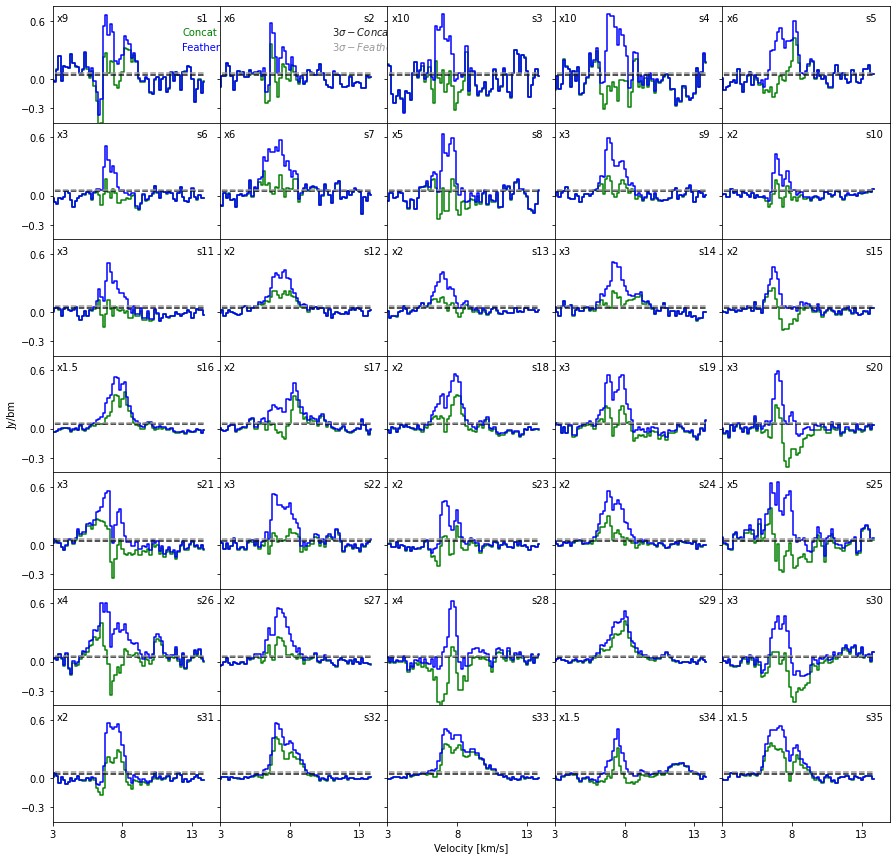

In [17]:
f.subplots_adjust(hspace=0)
f.subplots_adjust(wspace=0)
#plt.savefig('Specplot',format="svg")
f